In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import time
import bisect 
%matplotlib inline 

In [2]:
#import the csv files
confirmed_df = pd.read_csv('time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('time_series_covid19_deaths_global.csv')

In [3]:
#Collect the titles of the file
#Titles for confirmed file and deaths file are the same
cols = confirmed_df.keys()

#Collect case numbers and dates
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()

In [4]:
#Set up lists of confirmde cases and death cases for each country

#Confirmed
china_cases = [] 
italy_cases = []
us_cases = [] 
spain_cases = [] 
france_cases = [] 
germany_cases = [] 
uk_cases = [] 
canada_cases = [] 

#Death
china_deaths = [] 
italy_deaths = []
us_deaths = [] 
spain_deaths = [] 
france_deaths = [] 
germany_deaths = [] 
uk_deaths = [] 
canada_deaths = []

In [5]:
#Collect the sum of each country for both confirmed and deaths
for i in dates:
    china_cases.append(confirmed_df[confirmed_df['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_df[confirmed_df['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_df[confirmed_df['Country/Region']=='US'][i].sum())
    spain_cases.append(confirmed_df[confirmed_df['Country/Region']=='Spain'][i].sum())
    france_cases.append(confirmed_df[confirmed_df['Country/Region']=='France'][i].sum())
    germany_cases.append(confirmed_df[confirmed_df['Country/Region']=='Germany'][i].sum())
    uk_cases.append(confirmed_df[confirmed_df['Country/Region']=='United Kingdom'][i].sum())
    canada_cases.append(confirmed_df[confirmed_df['Country/Region']=='Canada'][i].sum())
    
    china_deaths.append(deaths_df[deaths_df['Country/Region']=='China'][i].sum())
    italy_deaths.append(deaths_df[deaths_df['Country/Region']=='Italy'][i].sum())
    us_deaths.append(deaths_df[deaths_df['Country/Region']=='US'][i].sum())
    spain_deaths.append(deaths_df[deaths_df['Country/Region']=='Spain'][i].sum())
    france_deaths.append(deaths_df[deaths_df['Country/Region']=='France'][i].sum())
    germany_deaths.append(deaths_df[deaths_df['Country/Region']=='Germany'][i].sum())
    uk_deaths.append(deaths_df[deaths_df['Country/Region']=='United Kingdom'][i].sum())
    canada_deaths.append(deaths_df[deaths_df['Country/Region']=='Canada'][i].sum())
  

In [6]:
# Number of death cases in every 5 days
china_deaths_5 = china_deaths[::5]
italy_deaths_5 = italy_deaths[::5]
us_deaths_5 = us_deaths[::5]
spain_deaths_5 = spain_deaths[::5]
france_deaths_5 = france_deaths[::5]
germany_deaths_5 = germany_deaths[::5]
uk_deaths_5 = uk_deaths[::5]
canada_deaths_5 = canada_deaths[::5]

#Number of increases of death cases in every 5 days
#Since the (countryname)_deaths_5 are already lists that only contain data on each 5th day, this step only 
#calculates the differences of adjacent numbers in the lists. 
china_deaths_increase = [j-i for i, j in zip(china_deaths_5[:-1], china_deaths_5[1:])]
italy_deaths_increase = [j-i for i, j in zip(italy_deaths_5[:-1], italy_deaths_5[1:])]
us_deaths_increase = [j-i for i, j in zip(us_deaths_5[:-1], us_deaths_5[1:])]
spain_deaths_increase = [j-i for i, j in zip(spain_deaths_5[:-1], spain_deaths_5[1:])]
france_deaths_increase = [j-i for i, j in zip(france_deaths_5[:-1], france_deaths_5[1:])]
germany_deaths_increase = [j-i for i, j in zip(germany_deaths_5[:-1], germany_deaths_5[1:])]
uk_deaths_increase = [j-i for i, j in zip(uk_deaths_5[:-1], uk_deaths_5[1:])]
canada_deaths_increase = [j-i for i, j in zip(canada_deaths_5[:-1], canada_deaths_5[1:])]

In [7]:
# Change the date format from dd/mm/yy to index numbers
dates = np.array([i for i in range(len(dates))]).reshape(-1, 1)
dates = dates.reshape(1, -1)[0]

In [ ]:
# Graph 1

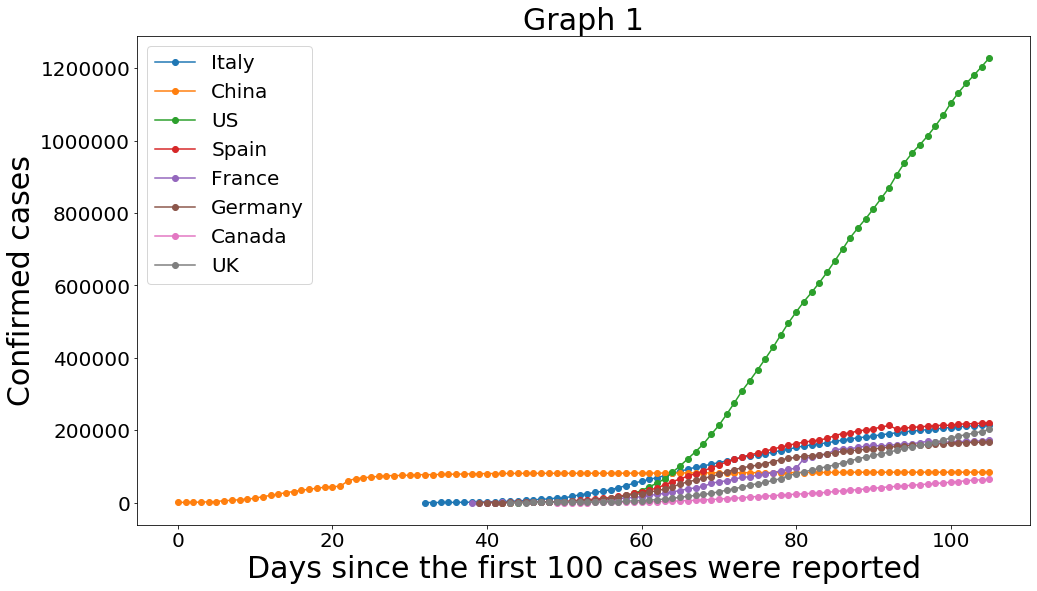

In [8]:
plt.figure(figsize=(16, 9))

# Evaluate the day that Italy got >100 cases
#i is the index of the date that Italy got more than 100 cases. Same as k, j, l, m, ..., p for other countries. 
i = bisect.bisect_left(italy_cases, 100)
italy_cases_100 = italy_cases[i:]
italy_date = dates[i:]
# Plot graph for Italy
plt.plot(italy_date, italy_cases_100, marker='o')

# Evaluate the day that China got >100 cases
j = bisect.bisect_left(china_cases, 100)
china_cases_100 = china_cases[j:]
china_date = dates[j:]
# Plot graph for China
plt.plot(china_date, china_cases_100,marker='o')

# Evaluate the day that US got >100 cases
k = bisect.bisect_left(us_cases, 100)
us_cases_100 = us_cases[k:]
us_date = dates[k:]
# Plot graph for US
plt.plot(us_date, us_cases_100,marker='o')

# Evaluate the day that Spain got >100 cases
l = bisect.bisect_left(spain_cases, 100)
spain_cases_100 = spain_cases[l:]
spain_date = dates[l:]
# Plot graph for Spain
plt.plot(spain_date, spain_cases_100,marker='o')

# Evaluate the day that France got >100 cases
m = bisect.bisect_left(france_cases, 100)
france_cases_100 = france_cases[m:]
france_date = dates[m:]
# Plot graph for France
plt.plot(france_date, france_cases_100,marker='o')

# Evaluate the day that Germany got >100 cases
n = bisect.bisect_left(germany_cases, 100)
germany_cases_100 = germany_cases[n:]
germany_date = dates[n:]
# Plot graph for Germany
plt.plot(germany_date, germany_cases_100,marker='o')

# Evaluate the day that Canada got >100 cases
o = bisect.bisect_left(canada_cases, 100)
canada_cases_100 = canada_cases[o:]
canada_date = dates[o:]
# Plot graph for Canada
plt.plot(canada_date, canada_cases_100,marker='o')

# Evaluate the day that UK got >100 cases
p = bisect.bisect_left(uk_cases, 100)
uk_cases_100 = uk_cases[p:]
uk_date = dates[p:]
# Plot graph for UK
plt.plot(uk_date, uk_cases_100,marker='o')


plt.title('Graph 1', size=30)
plt.xlabel('Days since the first 100 cases were reported', size=30)
plt.ylabel('Confirmed cases', size=30)
plt.legend(['Italy', 'China', 'US', 'Spain', 'France', 'Germany', 'Canada', 'UK'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


In [9]:
#Graph 2

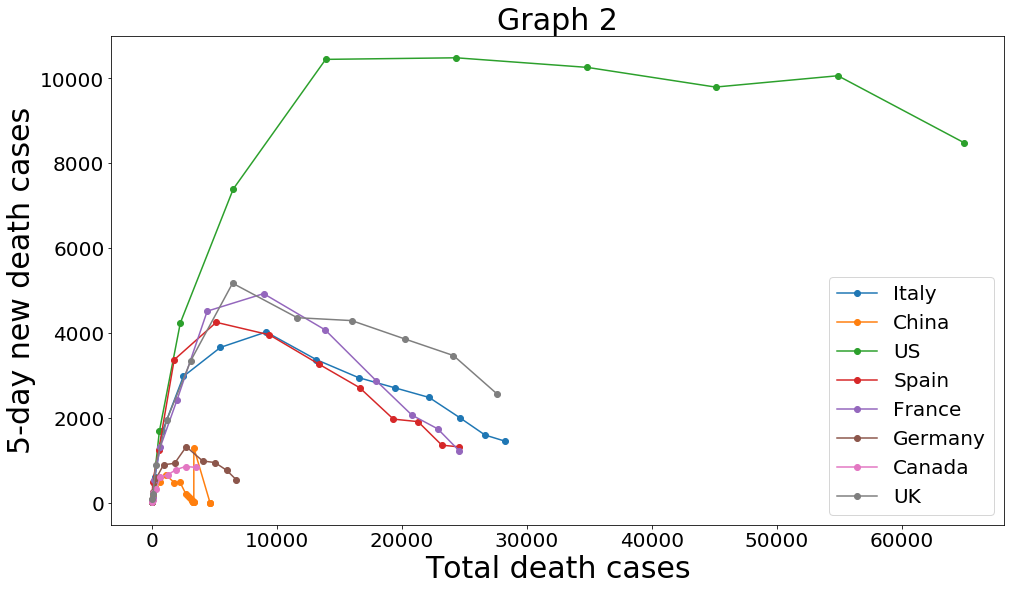

In [10]:
plt.figure(figsize=(16, 9))

# Evaluate the day that Italy got >10 increases
i = bisect.bisect_left(italy_deaths_increase, 10)
italy_deaths_increase_10 = italy_deaths_increase[i:]
italy_deaths_new = italy_deaths_5[i:(i+len(italy_deaths_increase_10))]

# Plot graph for Italy
plt.plot(italy_deaths_new, italy_deaths_increase_10, marker='o')


# Evaluate the day that China got >10 increases
j = bisect.bisect_left(china_deaths_increase, 10)
china_deaths_increase_10 = china_deaths_increase[j:]
china_deaths_new = china_deaths_5[j:(j+len(china_deaths_increase_10))]

# Plot graph for China
plt.plot(china_deaths_new, china_deaths_increase_10, marker='o')


# Evaluate the day that US got >10 increases
k = bisect.bisect_left(us_deaths_increase, 10)
us_deaths_increase_10 = us_deaths_increase[k:]
us_deaths_new = us_deaths_5[k:(k+len(us_deaths_increase_10))]

# Plot graph for US
plt.plot(us_deaths_new, us_deaths_increase_10, marker='o')


# Evaluate the day that Spain got >10 increases
l = bisect.bisect_left(spain_deaths_increase, 10)
spain_deaths_increase_10 = spain_deaths_increase[l:]
spain_deaths_new = spain_deaths_5[l:(l+len(spain_deaths_increase_10))]

# Plot graph for Spain
plt.plot(spain_deaths_new, spain_deaths_increase_10, marker='o')


# Evaluate the day that France got >10 increases
m = bisect.bisect_left(france_deaths_increase, 10)
france_deaths_increase_10 = france_deaths_increase[m:]
france_deaths_new = france_deaths_5[m:(m+(len(france_deaths_increase_10)))]

# Plot graph for France
plt.plot(france_deaths_new, france_deaths_increase_10, marker='o')


# Evaluate the day that Germany got >10 increases
n = bisect.bisect_left(germany_deaths_increase, 10)
germany_deaths_increase_10 = germany_deaths_increase[n:]
germany_deaths_new = germany_deaths_5[n:(n+len(germany_deaths_increase_10))]

# Plot graph for Germany
plt.plot(germany_deaths_new, germany_deaths_increase_10, marker='o')


# Evaluate the day that Canada got >10 increases
o = bisect.bisect_left(canada_deaths_increase, 10)
canada_deaths_increase_10 = canada_deaths_increase[o:]
canada_deaths_new = canada_deaths_5[o:(o+len(canada_deaths_increase_10))]

# Plot graph for Canada
plt.plot(canada_deaths_new, canada_deaths_increase_10, marker='o')


# Evaluate the day that UK got >10 increases
p = bisect.bisect_left(uk_deaths_increase, 10)
uk_deaths_increase_10 = uk_deaths_increase[p:]
uk_deaths_new = uk_deaths_5[p:(p+len(uk_deaths_increase_10))]

# Plot graph for UK
plt.plot(uk_deaths_new, uk_deaths_increase_10, marker='o')


plt.title('Graph 2', size=30)
plt.xlabel('Total death cases', size=30)
plt.ylabel('5-day new death cases', size=30)
plt.legend(['Italy', 'China', 'US', 'Spain', 'France', 'Germany', 'Canada', 'UK'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()